In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import cross_validation, preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [142]:
def data_frame(string):
    df = pd.read_csv(string,names=[i for i in range(1,25)])
    lis = [i for i in range(len(df)+1)]
    df[0] =  pd.DataFrame({'col':lis})
    df.set_index(0)
    # print(df[2][4])
    #(df.head())
    l = []
    for i in range(len(df)):
        for x in range(1,25):
            l.append(df[x][i])
    df_new = pd.DataFrame()
    df_new['d_train'] = pd.DataFrame({'d_train':l})
    #print(df_new['d_train'].head())
    return df_new['d_train']

In [143]:
def previous_low(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].min()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].min()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_low':l})
    return df_new
def previous_high(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].max()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].max()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_high':l})
    return df_new
    
def previous_avg(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].mean()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].mean()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_avg':l})
    return df_new

def today_low(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].min()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_low':l})
    return df_new
    
    
def today_high(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].max()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_high':l})
    return df_new
    
def today_avg(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].mean()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_avg':l})
    return df_new

def getAll(string):
    l = []
    l.append(today_low(string))
    l.append(today_high(string))
    l.append(today_avg(string))
    return l
    
    

In [144]:
df_x = pd.DataFrame()
df_y = pd.DataFrame()

df_y['d_train'] = data_frame('Demand_Train.csv')
df_x['d_pred'] = data_frame('Demand_Train_pred.csv')
#df_x['today_low'],df_x['today_high'],df_x['today_avg'] = getAll('Demand_Train_pred.csv')

df_y['p_train'] = data_frame('Price_Train.csv')
df_x['p_pred'] = data_frame('Price_Train_pred.csv')

df_y['s_train'] = data_frame('Solar_Train.csv')
df_x['s_pred'] = data_frame('Solar_Train_pred.csv')





In [145]:
df_x.fillna('bfill',inplace=True)
df_y.fillna('bfill',inplace=True)

In [146]:
#print(df_x.tail(),df_y.tail())

In [147]:
# print(df_x.head())
# # fig = plt.figure()
# # ax1 = plt.subplot2grid((1,1),(0,0))
# # ax2 = plt.subplot2grid((1,1),(1,1))
# x = (df_x['d_train']-df_x['s_train']) - (df_y['d_pred']-df_y['s_pred'])
# x.plot()
# # df_new['d_train'].plot(ax = ax2,label='Time')

# plt.legend()
# plt.show()

In [148]:
X = np.array(df_x).astype('float')
X = preprocessing.scale(X)
y = np.array(df_y).astype('float')
# from sklearn.utils import resample
# X, y = resample(X, y, random_state=0)
# print(X[:5],y[:5])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.0)
clf_d = LinearRegression()
# clf = RandomForestClassifier()
# clf_d = svm.SVR(kernel = 'linear') 
clf_d.fit(X_train,y_train)
#clf_d.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
df_test = pd.DataFrame()
df_test['d'] = data_frame('Demand_Test_pred.csv')
df_test['p'] = data_frame('Price_Test_pred.csv')
df_test['s'] = data_frame('Solar_Test_pred.csv')
#df_test['today_low'],df_test['today_high'],df_test['today_avg'] = getAll('Demand_Train_pred.csv')

In [150]:
df_out = pd.DataFrame()
df_out = clf_d.predict(preprocessing.scale(df_test))
# t_out = pd.DataFrame()
# t_out = clf_d.predict(X_test)

In [151]:
print(df_out[:5])
print(df_test[:5])
za = pd.DataFrame(df_out-df_test)
# ya = pd.DataFrame(y_test-t_out)
# print(ya.mean())
za.sum()/1200

[[ 53.72647538   1.37082987   0.13534027]
 [ 15.71946023   1.35003624   0.13802312]
 [ 60.20053803   1.21874007   0.12708614]
 [ 55.63423955   0.9960342    0.11637609]
 [ 18.52549748   1.39898345   0.14020039]]
       d     p    s
0  46.52  1.28  0.0
1  19.32  1.27  0.0
2  51.18  1.12  0.0
3  47.95  0.89  0.0
4  21.32  1.32  0.0


d    27.874452
p     0.128041
s     2.535650
dtype: float64

In [152]:
df_p = pd.DataFrame(df_out)
print(df_test.head())
print(df_p.head())

       d     p    s
0  46.52  1.28  0.0
1  19.32  1.27  0.0
2  51.18  1.12  0.0
3  47.95  0.89  0.0
4  21.32  1.32  0.0
           0         1         2
0  53.726475  1.370830  0.135340
1  15.719460  1.350036  0.138023
2  60.200538  1.218740  0.127086
3  55.634240  0.996034  0.116376
4  18.525497  1.398983  0.140200


In [153]:
df_p.describe()

,0,1,2
count,2400.000000,2400.000000,2400.000000
mean,76.399647,2.906941,6.863150
std,56.640027,1.157964,8.768020
min,4.394935,0.551046,0.098046
25%,25.329624,2.017704,0.172384
50%,64.410575,2.749615,0.312382
75%,115.115171,3.603652,13.807643
max,325.449153,8.029792,31.320768


In [154]:
d = pd.DataFrame()
d[0] = df_p[0] - df_p[2]
d[0] = d[0] 
d[1] = df_p[1] + 0.45  #.45


In [155]:
# for i in range(50):
#     z = 0.
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
#         need += da[i*24+j]
# #     for j in range(24):
# #         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
# #         z = z + need * df_p[1][i*24+j]
# #     z = z/24.
# #     for j in range(24):
# #         need = df_p[0][i*24+j]- df_p[2][i*24+j]
# #         if need * df_p[1][i*24+j] > z:
# #             need = need - 4
# #         else:
# #             need = need + 5
#         d[0][i*24+j] = need

In [156]:
d[0] = d[0]
p = pd.DataFrame()
p[0] = d[1]
p[1] = d[0]
p.reset_index()
p.to_csv('9.csv',index=False,header=None)

In [157]:
data = [i for i in range(900*24)]
label = []

In [158]:
p.head()

,0,1
0,1.820830,53.591135
1,1.800036,15.581437
2,1.668740,60.073452
3,1.446034,55.517863
4,1.848983,18.385297


In [159]:
import numpy as np
dp = np.zeros(shape=[2500,55], dtype=np.float)
prb = np.zeros(shape=[2500,55], dtype=np.float)
r = np.zeros(shape=[2500,], dtype=np.float)
p = np.zeros(shape=[2500,], dtype=np.float)
flag = np.zeros(shape=[2500,55], dtype=np.float)


In [160]:
r = np.array(d[0])
p = np.array(d[1])

In [161]:
# print(len(r))

In [162]:
def solv2e(curr, b):
    global dp
    global r
    global p
    global flag
    global prb
#     print(type(flag))
#     pass
    if curr >= 2400:
#         print(curr, b)
        return 0
    if r[curr] <= 0:
        flag[curr, b] = 1
        dp[curr, b] = 1e9
        for i in range(5):
            if i + b > 25:
                continue
            cost = i*1.25*p[curr]
            x = solv2e(curr+1,b+i)
            if cost + x < dp[curr,b]:
                dp[curr,b] = cost + x
                prb[curr,b] = i
        return dp[curr, b]
    if flag[curr,b] > 0:
        return dp[curr,b]
    flag[curr,b] = 1
    dp[curr,b] = 1e9
    for i in range(int(min(5,min(b,r[curr]))+1)):
        cost = (r[curr] - i)*p[curr]
        x = solv2e(curr+1, b-i)
        if cost + x < dp[curr,b]:
            dp[curr,b] = cost + x
            prb[curr,b] = -i
#         dp[curr,b] = min(dp[curr,b], cost + solve(curr+1, b-i))
    for j in range(4):
        i = j+1
        if i + b > 25:
            continue
        cost = (r[curr] + i*1.25)*p[curr]
        x = solv2e(curr+1, b+i)
        if cost + x < dp[curr, b]:
            dp[curr,b] = cost + x
            prb[curr, b] = i
#         dp[curr,b] = min(dp[curr,b], cost + solve(curr+1, b+i))
    return dp[curr,b]

In [163]:
import sys
sys.setrecursionlimit(10000)
ans = solv2e(0,0)
print(ans)

589764.252908


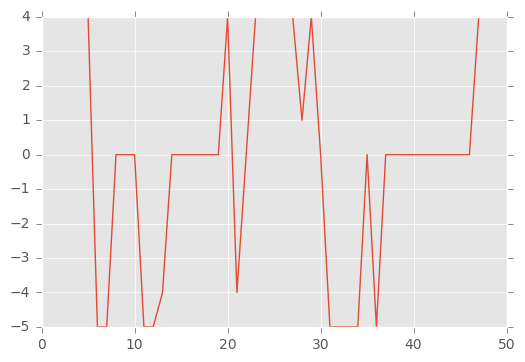

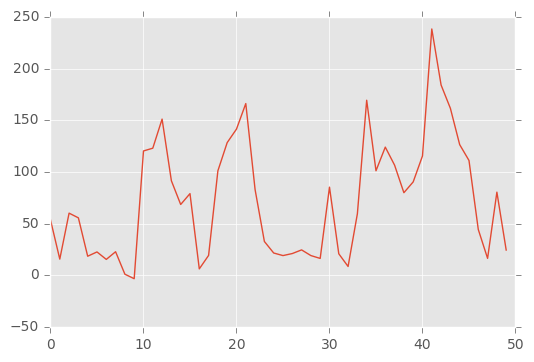

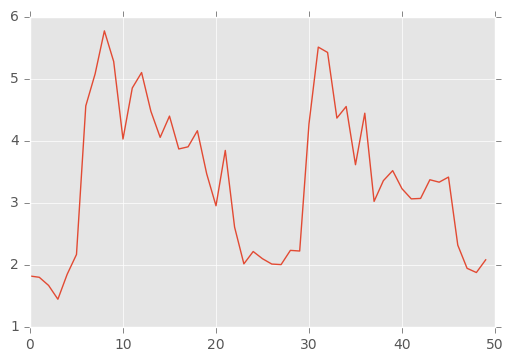

In [164]:
da = []
bat = 0
for i in range(2400):
    da.append(prb[i,bat])
    bat += int(prb[i,bat])
plt.plot(np.array(da[:50]))
plt.show()
plt.plot(d[0][:50])
plt.show()
plt.plot(d[1][:50])
plt.show()

In [165]:
z = 0
for i in range(2400):
    z += r[i]*p[i]
print(z)

593868.56354


In [166]:
for i in range(100):
    z = 0.
    for j in range(24):
        need = df_p[0][i*24+j]- df_p[2][i*24+j] 
        need += da[i*24+j]
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
#         z = z + need * df_p[1][i*24+j]
#     z = z/24.
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j]
#         if need * df_p[1][i*24+j] > z:
#             need = need - 4
#         else:
#             need = need + 5
        d[0][i*24+j] = need

In [167]:
p = pd.DataFrame()
p[0] = d[1]
p[1] = d[0] +1  #+1 #-1 
p[0].loc[p[0]>=7]=7
p.reset_index()
p.to_csv('9.csv',index=False,header=None)

In [168]:
# p.describe()